## Exercícios

1 - Aplique os algoritmos K-means [1] e AgglomerativeClustering [2] em qualquer dataset que você desejar (recomendação: iris). Compare os resultados utilizando métricas de avaliação de clusteres (completeness e homogeneity, por exemplo) [3].

* [1] http://scikit-learn.org/stable/modules/clustering.html#k-means

* [2] http://scikit-learn.org/0.17/modules/clustering.html#hierarchical-clustering

* [3] http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

2 - Qual o valor de K (número de clusteres) você escolheu para a questão anterior? Desenvolva o Método do Cotovelo (não utilizar lib!) e descubra o K mais adequado. Após descobrir, aplique novamente o K-means com o K adequado. 

* Ajuda: atributos do [k-means](http://scikit-learn.org/0.17/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

3 - Após a questão 2, você aplicou o algoritmo com K apropriado. Refaça o cálculo das métricas de acordo com os resultados de clusters obtidos com a questão anterior e verifique se o resultado melhorou.







In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn import decomposition

In [2]:
headers = ["n1", "n2", "n3", "n4","n5", "level"]
data = pd.read_csv("user_knowledge_level.csv", header=None, names=headers)

In [3]:
data.head()

,n1,n2,n3,n4,n5,level
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


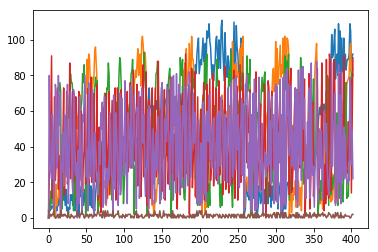

In [18]:
plt.plot(data)
plt.show()

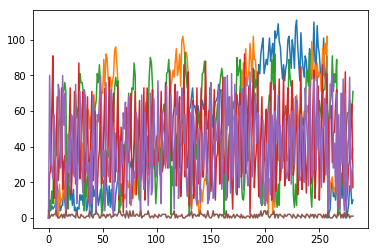

In [19]:
plt.plot(trainData)
plt.show()

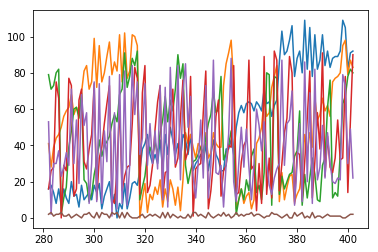

In [20]:
plt.plot(testData)
plt.show()

In [8]:
for h in headers:
    data[h] = data[h].astype('category')
    data[h] = data[h].cat.codes


data.head()

,n1,n2,n3,n4,n5,level
0,0,0,0,0,0,4
1,5,9,10,25,80,0
2,4,7,5,26,31,1
3,7,11,15,61,28,2
4,5,9,8,91,22,1


In [9]:
size = len(data)
trainSize = int(math.floor(size * 0.7))
trainData = data[:trainSize]
testData = data[trainSize:]


In [10]:
reddata = decomposition.PCA(n_components=2).fit_transform(trainData)

kmeans = KMeans(n_clusters=22, random_state=0).fit(trainData)
predi = kmeans.predict(trainData)



reddata_df = pd.DataFrame(reddata)
reddata_df[2] = predi

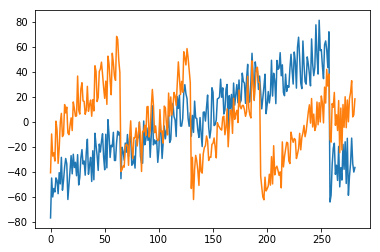

In [11]:
plt.plot(reddata)
plt.show()

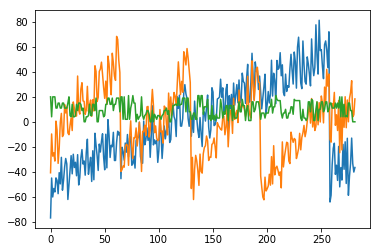

In [12]:
plt.plot(reddata_df)
plt.show()

In [13]:
Clust = AgglomerativeClustering(n_clusters=3)
pred = Clust.fit_predict(trainData)


In [14]:
reddata_df = pd.DataFrame(reddata)
reddata_df[2] = pred

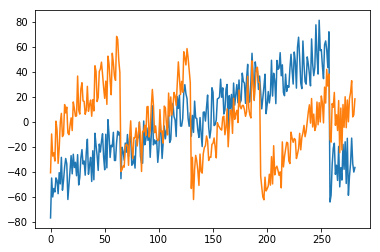

In [15]:
plt.plot(reddata)
plt.show()

In [16]:
clusters= np.arange(1,100); vetor = []
for n in clusters:
    kmeans.n_clusters = n
    kmeans.fit(trainData)    
    vetor.append(kmeans.inertia_)

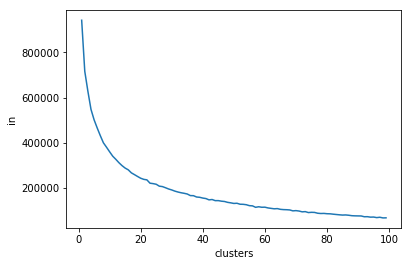

In [17]:
plt.figure()
plt.xlabel('clusters')
plt.ylabel('in')
plt.plot(clusters,vetor)
plt.show()
